##### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap
import string
import nltk
%matplotlib inline

In [4]:
!pip install nltk

##### Import Data Set

In [5]:
df = pd.set_option('display.max_rows',None)
df

In [6]:
df = pd.read_csv("drugsCom_raw.tsv",on_bad_lines='skip',sep='\t')
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


### EDA

In [7]:
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [8]:
df = df.drop(['Unnamed: 0','date'],axis = 1)
df.head()

,drugName,condition,review,rating,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,37


In [9]:
df.nunique()

drugName         3436
condition         884
review         112329
rating             10
usefulCount       389
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

drugName         0
condition      899
review           0
rating           0
usefulCount      0
dtype: int64

In [12]:
df = df.dropna(subset=['condition'])

In [13]:
df.shape

(160398, 5)

In [14]:
df.head(10)

,drugName,condition,review,rating,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,37
5,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,43
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,5
7,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,32
8,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1.0,11
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,1


In [15]:
correlation = df['usefulCount'].corr(df['rating'])
print(correlation)

0.2343793984986927


In [16]:
# Things I can try here.
# Top 10 rated drugs
# bottom 10 rated drugs 
# Top 10 useful count and bottom 10 useful count. top 10 drugs fro valuye counts 
# Revies of Diabetes, Type 2 ,Depression, High BP, check their ratings
# Using graph in drug name , useful count and rating

In [17]:
df.dtypes

drugName        object
condition       object
review          object
rating         float64
usefulCount      int64
dtype: object

##### Lets start by analyzing the reviews of all drugs

In [18]:
ten_rating = df.loc[df['rating'] == 10 , 'drugName'].unique().tolist()
print(ten_rating)    

['Aripiprazole', 'L-methylfolate', 'Lamotrigine', 'Nilotinib', 'Trazodone', 'Etanercept', 'Eflornithine', 'Daytrana', 'Toradol', 'Mobic', 'Ledipasvir / sofosbuvir', 'Dulaglutide', 'Bupropion', 'Buprenorphine', 'Tretinoin', 'Effexor XR', 'Elbasvir / grazoprevir', 'Clomiphene', 'Amitiza', 'Etonogestrel', 'Sildenafil', 'Sertraline', 'Lithium', 'Cialis', 'Alprazolam', 'Amlodipine / olmesartan', 'Ropinirole', 'Zoledronic acid', 'Levonorgestrel', 'Propranolol', 'Ethinyl estradiol / levonorgestrel', 'Epiduo', 'Xanax', 'Desvenlafaxine', 'Loratadine', 'Cardura XL', 'Viibryd', 'Ethinyl estradiol / norelgestromin', 'Propofol', 'Lorcaserin', 'Zanaflex', 'Aczone', 'Provera', 'Diflucan', 'Lisinopril', 'Empagliflozin', 'Mirena', 'Metoprolol', 'Ulipristal', 'Eletriptan', 'Testosterone', 'Tioconazole', 'Efavirenz / emtricitabine / tenofovir', 'Aleve', 'Victoza', 'Temozolomide', 'Meloxicam', 'Relpax', 'Clindamycin', 'Plan B', 'Lisdexamfetamine', 'Liraglutide', 'Escitalopram', 'Rizatriptan', 'Ziana', 'Bo

In [19]:
num_drug_names = len(ten_rating)
print(num_drug_names)

2691


In [20]:
df_sorted = df.sort_values(by='usefulCount', ascending=False)
df_sorted.head(5)

,drugName,condition,review,rating,usefulCount
33552,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10.0,1291
6716,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10.0,1291
21708,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10.0,1247
4249,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10.0,1247
146145,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9.0,949


In [21]:
df_sorted.usefulCount.value_counts().nunique()

179

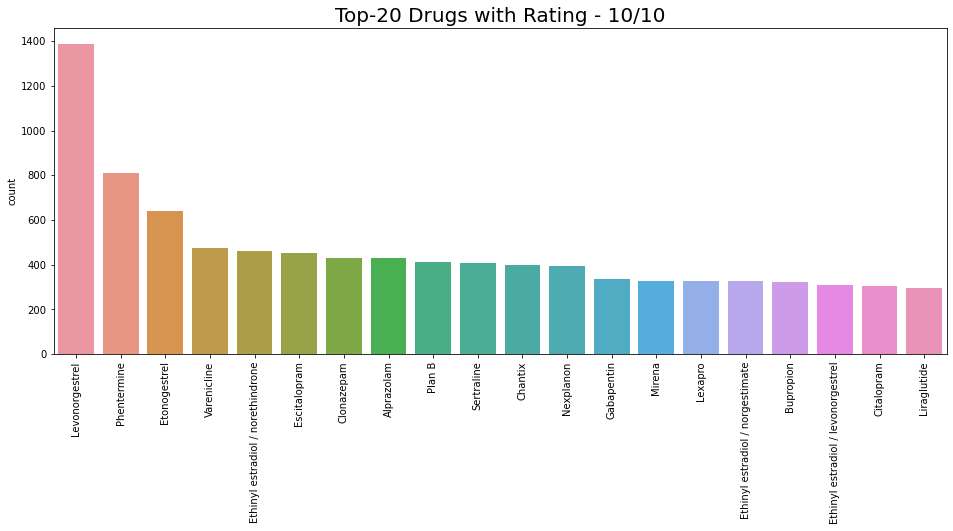

In [22]:
#Check top 20 drugs with rating=10/10
plt.figure(figsize = (16,6))
top_20_ratings = df_sorted[df_sorted['rating'] == 10]['drugName'].value_counts().head(20)
sns.barplot(x = top_20_ratings.index, y = top_20_ratings.values  )
plt.xticks(rotation=90)
plt.title('Top-20 Drugs with Rating - 10/10', fontsize=20)
plt.ylabel('count')
plt.show()

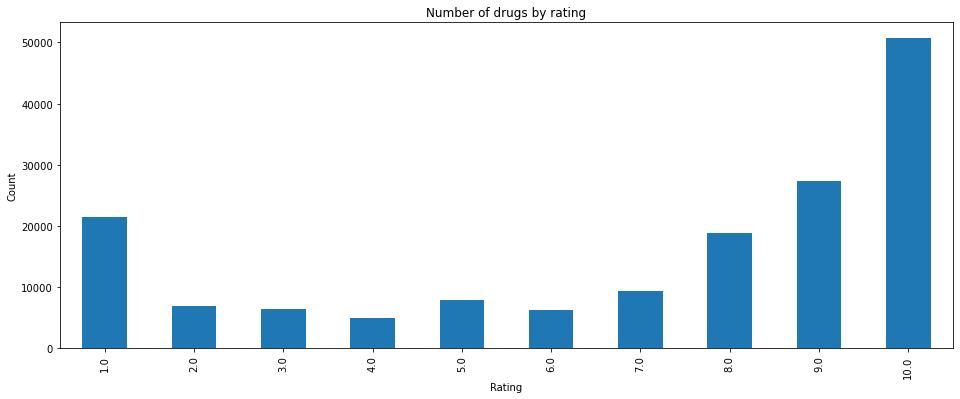

In [23]:
plt.figure(figsize = (16,6))
rating_counts = df['rating'].value_counts().sort_index()
rating_counts.plot(kind='bar')
plt.title('Number of drugs by rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
#Plot for the numver of drugs with ratings

In [24]:
# Applying goal conditions
goal_condition=['Depression','High Blood Pressure','Diabetes, Type 2']
df1=df[df['condition'].isin(goal_condition)]
df1.head(10)

,drugName,condition,review,rating,usefulCount
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,3
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,3
50,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24
67,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,166
81,Wellbutrin,Depression,"""Started taking it and I slept well at night a...",4.0,15
96,Aripiprazole,Depression,"""Intake Effexor XR 375 mg, and lorazepam for d...",4.0,33
104,Amlodipine / olmesartan,High Blood Pressure,"""My blood pressure has been around 160/100. Do...",10.0,10
143,Desvenlafaxine,Depression,"""This medication is amazing! After 3 days of b...",10.0,101
146,Dulaglutide,"Diabetes, Type 2","""I was recently referred to a endocrinologist ...",9.0,12


In [25]:
df1_sorted = df1.sort_values(by='rating', ascending=False)
df1_sorted.head(10)

,drugName,condition,review,rating,usefulCount
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54
53654,Elavil,Depression,"""I have been on Elavil for depression for 20 y...",10.0,102
52878,Bupropion,Depression,"""Started out on generic XL 150mg/day taken in ...",10.0,86
126208,Lisinopril,High Blood Pressure,"""Blood pressure droped from 140&#039;s over lo...",10.0,48
52867,Bupropion,Depression,"""Tried Bupropion SR generic first, worked well...",10.0,65
52838,Escitalopram,Depression,"""I just wanted to post my experience with lexa...",10.0,100
52829,Desvenlafaxine,Depression,"""Started on 50mg then had issues went to 100mg...",10.0,16
52812,Desvenlafaxine,Depression,"""Pristiq is the first medication that worked f...",10.0,23
52806,Canagliflozin,"Diabetes, Type 2","""A1C was 14.9. Normal insulin program got me d...",10.0,43
52775,L-methylfolate,Depression,"""In 28 years, after dozens of antidepressants,...",10.0,225


In [26]:
df1.shape

(13944, 5)

##### These are the drug ratings and drugname count with given 3 conditions

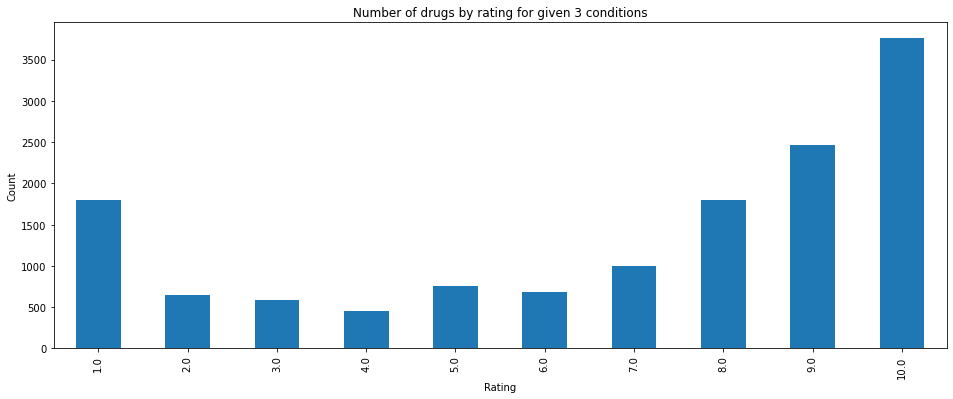

In [27]:
plt.figure(figsize = (16,6))
rating_counts = df1_sorted['rating'].value_counts().sort_index()
rating_counts.plot(kind='bar')
plt.title('Number of drugs by rating for given 3 conditions')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

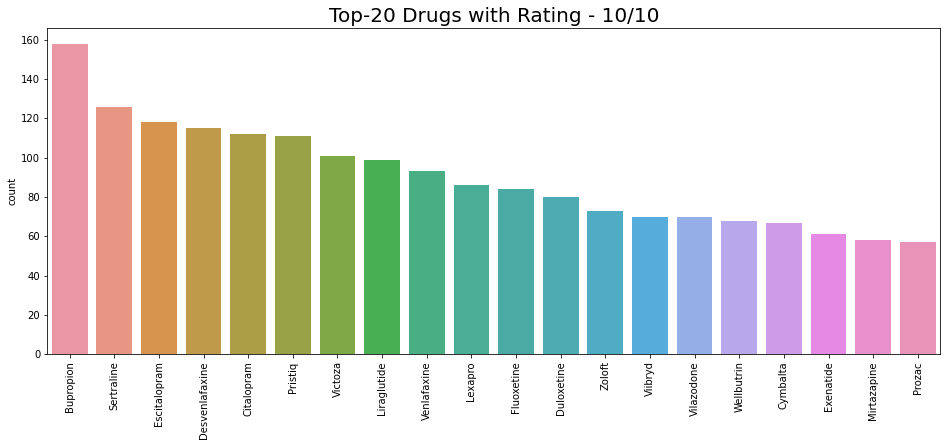

In [28]:
#Check top 20 drugs with rating=10/10
plt.figure(figsize = (16,6))
top_20_ratings = df1[df1['rating'] == 10]['drugName'].value_counts().head(20)
sns.barplot(x = top_20_ratings.index, y = top_20_ratings.values  )
plt.xticks(rotation=90)
plt.title('Top-20 Drugs with Rating - 10/10', fontsize=20)
plt.ylabel('count')
plt.show()

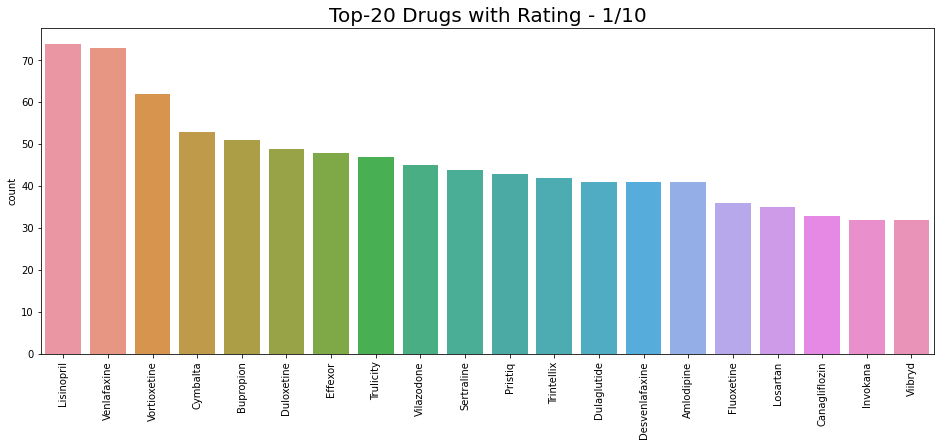

In [29]:
#Check top 20 drugs with rating=10/10
plt.figure(figsize = (16,6))
top_20_ratings = df1[df1['rating'] == 1]['drugName'].value_counts().head(20)
sns.barplot(x = top_20_ratings.index, y = top_20_ratings.values  )
plt.xticks(rotation=90)
plt.title('Top-20 Drugs with Rating - 1/10', fontsize=20)
plt.ylabel('count')
plt.show()

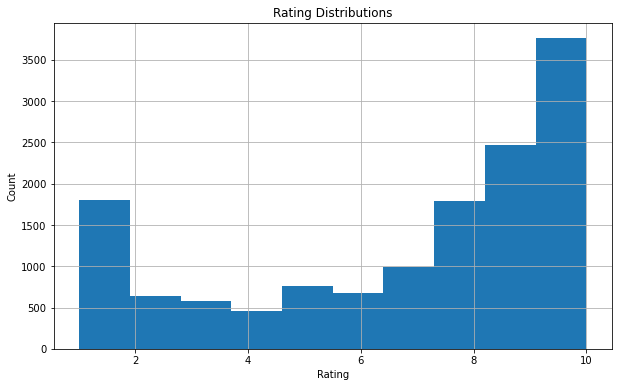

In [30]:
# Plotting 'rating' distribution
plt.figure(figsize = (10,6))
df1['rating'].hist()
plt.title("Rating Distributions")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [31]:
df1.condition.value_counts()

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

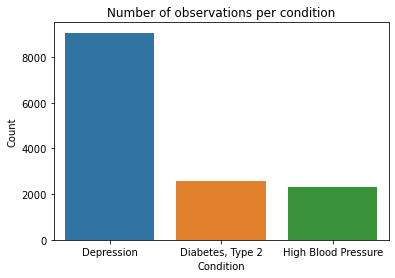

In [32]:
sns.countplot(x="condition", data=df1)
plt.title("Number of observations per condition")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()
#This plot shows count for conditins 

In [33]:
#Drugs for depression, High BP and Diabetes type 2 

In [34]:
depression_drugs = df.loc[df['condition'] == 'Depression', ['drugName', 'rating', 'usefulCount','review']]
depression_drugs = depression_drugs.groupby('drugName').agg({'rating': 'mean', 'usefulCount': 'count','review':''.join}).reset_index()
depression_drugs = depression_drugs.sort_values(['usefulCount', 'rating'], ascending=False)
depression_drugs.head(10)

,drugName,rating,usefulCount,review
14,Bupropion,7.358834,549,"""I was really glad that I experienced none of ..."
81,Sertraline,7.167756,459,"""1 week on Zoloft for anxiety and mood swings...."
92,Venlafaxine,6.478261,437,"""my gp started me on Venlafaxine yesterday to ..."
67,Pristiq,7.188995,418,"""This will be my third week on Pristiq 50mg an..."
21,Desvenlafaxine,7.239130,414,"""This medication is amazing! After 3 days of b..."
16,Citalopram,7.567010,388,"""After 13 years of untreated depression, anxie..."
29,Escitalopram,7.613158,380,"""I&#039;ve been on lexapro for several years. ..."
96,Vortioxetine,5.881159,345,"""I only took this medication for a few days, m..."
24,Duloxetine,6.548780,328,"""I take cymbalta for depression and anxiety. I..."
94,Vilazodone,6.431746,315,"""I started Viibryd -- 20 mg/day -- over a year..."


In [35]:
HighBP_drugs = df.loc[df['condition'] == 'High Blood Pressure',['drugName', 'rating', 'usefulCount','review']]
HighBP_drugs = HighBP_drugs.groupby('drugName').agg({'rating': 'mean', 'usefulCount': 'count','review': ' '.join}).reset_index()
HighBP_drugs = HighBP_drugs.sort_values(['usefulCount', 'rating'], ascending=False)
HighBP_drugs.head(10)

,drugName,rating,usefulCount,review
81,Lisinopril,5.155303,264,"""I&#039;m a 27 year old white male in good sha..."
83,Losartan,5.524096,166,"""I took 50mg of Cozaar, 1 x daily for 5 days, ..."
8,Amlodipine,4.875817,153,"""This pill is absolute POISON!!! I only took i..."
97,Nebivolol,6.763636,110,"""49 yo male, generally healthy including norma..."
28,Bystolic,6.616162,99,"""I have limited experience with any other Bloo..."
88,Metoprolol,6.293478,92,"""I have been on metoprolol er 12.5mg since Sep..."
104,Olmesartan,7.597222,72,"""Was previously taking Lisinopril at the highe..."
133,Valsartan,5.772727,66,"""I took Diovan for two months to reduce blood ..."
62,Hydrochlorothiazide,5.484848,66,"""I went on it with my BP at 145/100 several ye..."
15,Atenolol,6.693548,62,"""This medication has helped me out alot. My b..."


In [36]:
diabetes_df = df[df['condition'].str.contains('Diabetes, Type 2')]
#Group the filtered DataFrame by 'drugName' and calculate the mean rating and count of reviews
diabetes_drugs = diabetes_df.groupby('drugName').agg({'rating': 'mean', 'usefulCount': 'count','review': lambda x: '|'.join(x)})
diabetes_drugs = diabetes_drugs.sort_values(['usefulCount', 'rating'], ascending=False)
diabetes_drugs.head(10)

,rating,usefulCount,review
drugName,,,
Liraglutide,7.722222,270,"""have only been on victorza for a few days. I..."
Victoza,7.980392,255,"""I&#039;ve been on Victoza for 13 days and hav..."
Dulaglutide,5.965368,231,"""Hey Guys, It&#039;s been 4 months since my l..."
Trulicity,5.805430,221,"""Started trulicity about 8 months ago at .75mg..."
Exenatide,7.197917,192,"""I was on Bydureon for about 2 months, I reall..."
Canagliflozin,5.979452,146,"""worst yeast infection ever! Running to the b..."
Invokana,6.111888,143,"""Within 12 days 100 mg brought my sugar down 4..."
Bydureon,7.058824,136,"""Within 2 weeks saw blood glucose more than ha..."
Metformin,6.209877,81,"""I don&#039;t like this particular brand of Me..."


In [37]:
# Highest rating of 10/10 drugnames 
rate10_dn = df1.loc[df1.rating == 10,'drugName']
rate10_dn.value_counts()
rate10_dn.head(10)

11              L-methylfolate
50                 Dulaglutide
67                  Effexor XR
104    Amlodipine / olmesartan
143             Desvenlafaxine
184                  Bupropion
185                 Lisinopril
187              Empagliflozin
223                    Victoza
251                Liraglutide
Name: drugName, dtype: object

###### WordCloud of drugnames which got rating 10/10

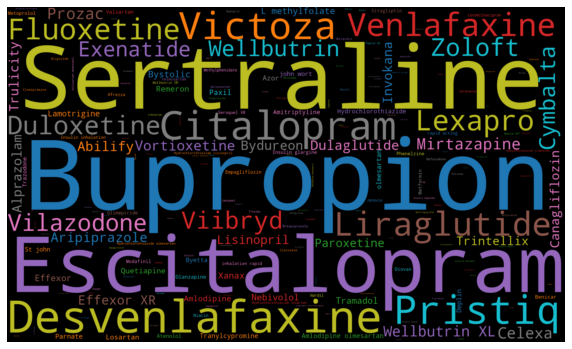

In [38]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
cmap = ListedColormap(colors)
text = (' '.join(rate10_dn)) # Stopwords
wordcloud = WordCloud(width = 2000, height = 1200, background_color = 'black',colormap=cmap).generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

In [39]:
# Highest rating of 1/10 drugnames 
rate1_dn = df1.loc[df1.rating == 1,'drugName']
rate1_dn.value_counts()
rate1_dn.head(10)

150         Fluoxetine
242    Levomilnacipran
298            Victoza
326        Venlafaxine
478            Pristiq
521          Exenatide
610        Venlafaxine
852           Losartan
861     Desvenlafaxine
888        Liraglutide
Name: drugName, dtype: object

###### WordCloud of drugnames which got rating 1/10

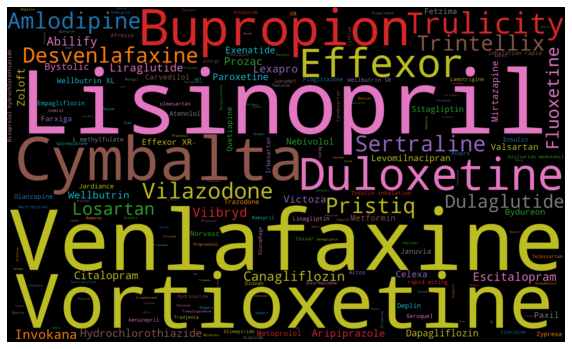

In [40]:
text = (' '.join(rate1_dn)) # Stopwords
wordcloud = WordCloud(width = 2000, height = 1200, background_color = 'black',colormap=cmap).generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

###### Now word cloud for reviews depression, High BP, Diabetes ,Type2 

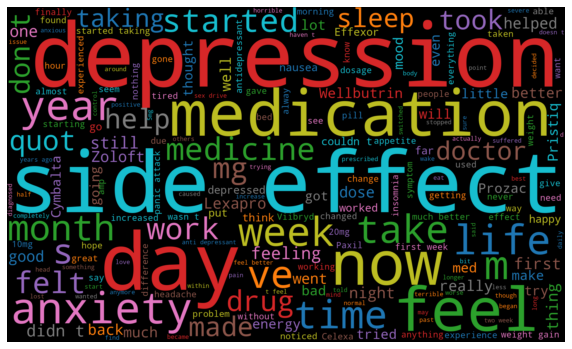

In [41]:
text = (' '.join(depression_drugs.review)) # Stopwords
wordcloud = WordCloud(width = 2000, height = 1200, background_color = 'black',colormap=cmap).generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

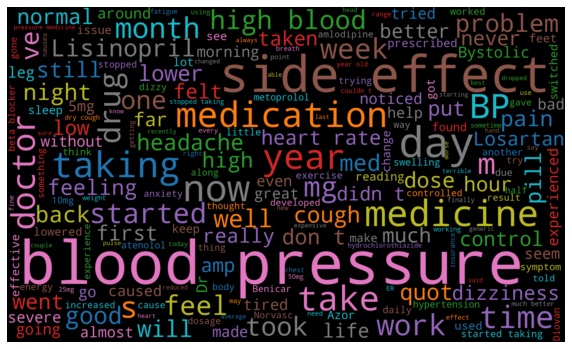

In [42]:
text = (' '.join(HighBP_drugs.review)) # Stopwords
wordcloud = WordCloud(width = 2000, height = 1200, background_color = 'black',colormap=cmap).generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

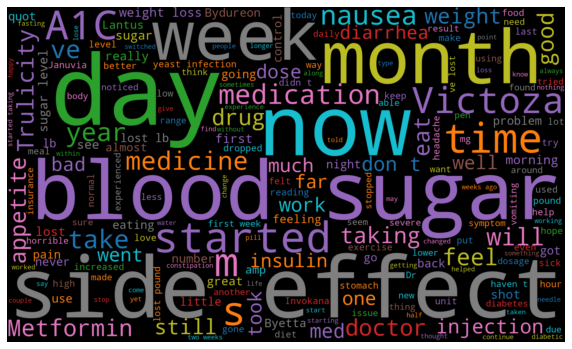

In [43]:
text = (' '.join(diabetes_drugs.review)) # Stopwords
wordcloud = WordCloud(width = 2000, height = 1200, background_color = 'black',colormap=cmap).generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

##### Natural Language Processing

#### Text Mining

In [44]:
for i in df1['review'][0:8]:
    print(i)

"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.

I only take Cymbalta now mostly for pain.

When I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."
"1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one  but that subsided as the week went on.  I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed."
"my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another 

In [45]:
#Now removing all the puntuation marks and white spaces from the review column.

In [46]:
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from wordcloud import STOPWORDS

In [47]:
stops = set(stopwords.words('english')) #English stopwords

stemmer = SnowballStemmer('english') #SnowballStemmer
stopwords = set(STOPWORDS)
def review_clean(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. Space join words
    return( ' '.join(stemming_words))

In [48]:
# Apply the above function on reviews
df1['review']=df1['review'].apply(review_clean)
df1.head(5)

C:\Users\sneha\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\sneha\AppData\Local\Temp\ipykernel_9040\365031761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['review']=df1['review'].apply(review_clean)


,drugName,condition,review,rating,usefulCount
11,L-methylfolate,Depression,taken anti depress year improv most moder seve...,10.0,54
31,Sertraline,Depression,week zoloft anxieti mood swing take mg morn br...,8.0,3
44,Venlafaxine,Depression,gp start venlafaxin yesterday help depress cha...,4.0,3
50,Dulaglutide,"Diabetes, Type 2",hey guy month sinc last post want give month s...,10.0,24
67,Effexor XR,Depression,medicin save life wit end anti depress readi g...,10.0,166


##### Sentiment Analysis

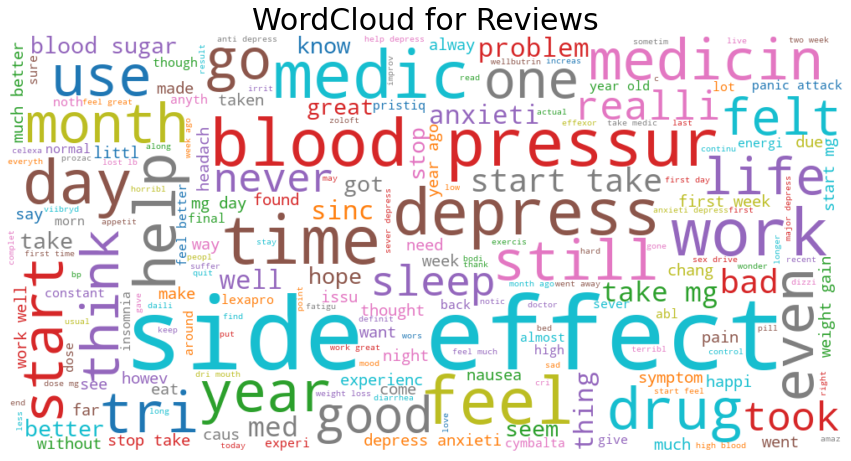

In [49]:
text = (' '.join(df1['review'])) # Stopwords
wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white',colormap=cmap).generate(text)
plt.figure(figsize=(15, 10))
plt.title('WordCloud for Reviews', fontsize = 30)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

In [50]:
# let's make a new column of review sentiment 
df1.loc[(df1['rating'] > 5), 'Review_Sentiment'] = 'Positive'
df1.loc[(df1['rating'] == 5), 'Review_Sentiment'] = 'Neutral'
df1.loc[(df1['rating'] < 5), 'Review_Sentiment'] = 'Negative'
df1.head(5)

C:\Users\sneha\AppData\Local\Temp\ipykernel_9040\1463589338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[(df1['rating'] > 5), 'Review_Sentiment'] = 'Positive'


,drugName,condition,review,rating,usefulCount,Review_Sentiment
11,L-methylfolate,Depression,taken anti depress year improv most moder seve...,10.0,54,Positive
31,Sertraline,Depression,week zoloft anxieti mood swing take mg morn br...,8.0,3,Positive
44,Venlafaxine,Depression,gp start venlafaxin yesterday help depress cha...,4.0,3,Negative
50,Dulaglutide,"Diabetes, Type 2",hey guy month sinc last post want give month s...,10.0,24,Positive
67,Effexor XR,Depression,medicin save life wit end anti depress readi g...,10.0,166,Positive


In [51]:
df1['Review_Sentiment'].value_counts()

Positive    9701
Negative    3487
Neutral      756
Name: Review_Sentiment, dtype: int64

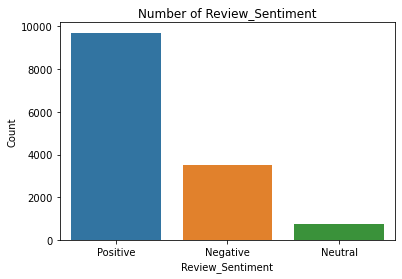

In [52]:
sns.countplot(x="Review_Sentiment", data=df1)
plt.title("Number of Review_Sentiment")
plt.xlabel("Review_Sentiment")
plt.ylabel("Count")
plt.show()
#This plot shows count for conditins 

In [53]:
#Word cloud for +ve sentiment

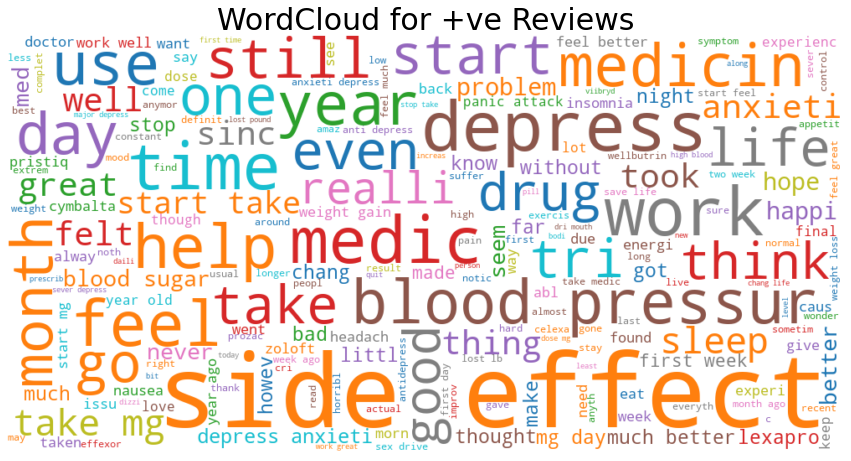

In [54]:
text = " ".join([text for text in df1['review'][df1['Review_Sentiment'] == 'Positive']]) # Stopwords
wordcloud = WordCloud(width = 1000, height = 500,stopwords = stopwords,background_color = 'White',colormap=cmap).generate(text)
plt.figure(figsize=(15, 10))
plt.title('WordCloud for +ve Reviews', fontsize = 30)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

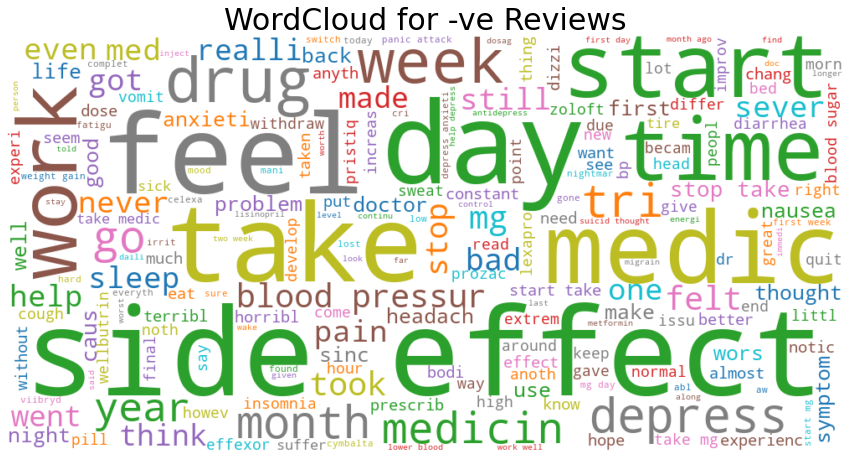

In [55]:
text = " ".join([text for text in df1['review'][df1['Review_Sentiment'] == 'Negative']]) # Stopwords
wordcloud = WordCloud(width = 1000, height = 500,stopwords = stopwords,background_color = 'White',colormap=cmap).generate(text)
plt.figure(figsize=(15, 10))
plt.title('WordCloud for -ve Reviews', fontsize = 30)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

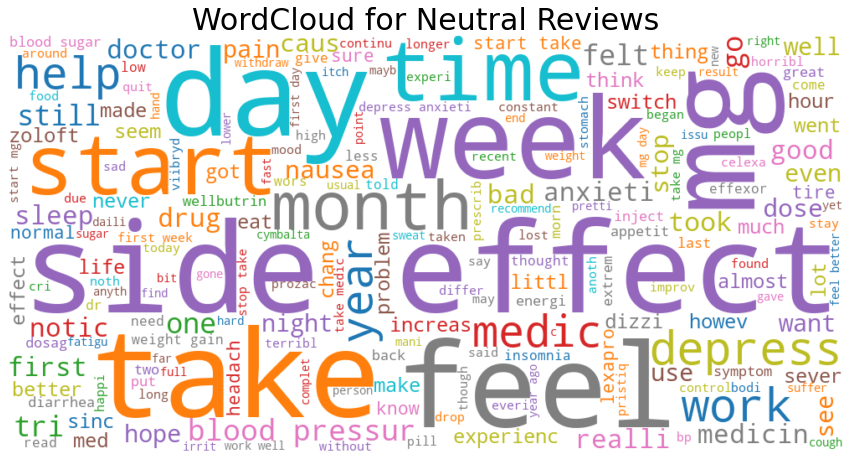

In [56]:
text = " ".join([text for text in df1['review'][df1['Review_Sentiment'] == 'Neutral']]) # Stopwords
wordcloud = WordCloud(width = 1000, height = 500,stopwords = stopwords,background_color = 'White',colormap=cmap).generate(text)
plt.figure(figsize=(15, 10))
plt.title('WordCloud for Neutral Reviews', fontsize = 30)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

##### Emotion Detection

In [57]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape 

(2477, 2)

In [58]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [59]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence.
import spacy
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [60]:
# Applying function to 'review'
df1['Sentiment_value']=df1['review'].apply(calculate_sentiment) 

C:\Users\sneha\AppData\Local\Temp\ipykernel_9040\2905148231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sentiment_value']=df1['review'].apply(calculate_sentiment)


In [61]:
# Sentiment score of the whole review
df1['Sentiment_value'].describe()

count    13944.000000
mean         0.903112
std          4.860207
min        -25.000000
25%         -2.000000
50%          1.000000
75%          4.000000
max         25.000000
Name: Sentiment_value, dtype: float64

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


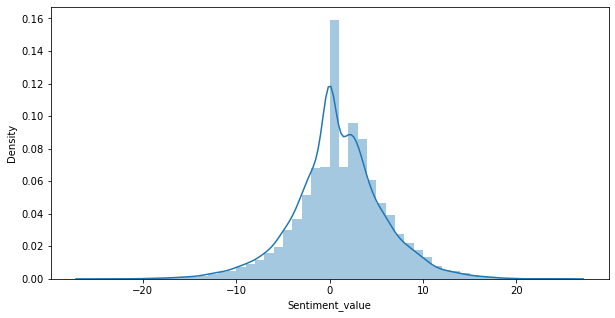

In [62]:
# Distplot of 'sentiment value'
plt.figure(figsize=(10,5))
sns.distplot(df1['Sentiment_value'])
plt.show()

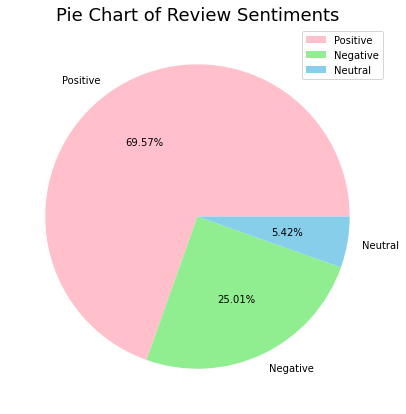

In [63]:
# A pie chart to represent the sentiments of the patients
size = [9701, 3487, 756]
colors = ['pink', 'lightgreen', 'skyblue']
labels = "Positive", "Negative", "Neutral"

plt.rcParams['figure.figsize'] = (7,7)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart of Review Sentiments', fontsize = 18)
plt.legend()
plt.show()

###### In order to apply ML algorithms we need to convert  our input into numbers

In [64]:
# Label Encoding 'Drugname' and 'Conditions'
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName']:
    label_encoder_feat[feature] = LabelEncoder()
    df1[feature] = label_encoder_feat[feature].fit_transform(df1[feature])

C:\Users\sneha\AppData\Local\Temp\ipykernel_9040\3594751705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[feature] = label_encoder_feat[feature].fit_transform(df1[feature])


In [65]:
df1.head(2)

,drugName,condition,review,rating,usefulCount,Review_Sentiment,Sentiment_value
11,173,Depression,taken anti depress year improv most moder seve...,10.0,54,Positive,2
31,275,Depression,week zoloft anxieti mood swing take mg morn br...,8.0,3,Positive,0


###### Model Building

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x = df1['review']
y = df1['Review_Sentiment']
x_train, x_test, y_train, y_test = train_test_split( x , y , test_size = 0.3, random_state = 42)

###### feature extraction using count vectorizer

In [68]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
import itertools

count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(x_train)
count_test = count_vectorizer.transform(x_test)

###### Confusion Matrix

In [69]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###### 1)Naive Bayes Algorithm

accuracy:   0.780
Confusion matrix, without normalization


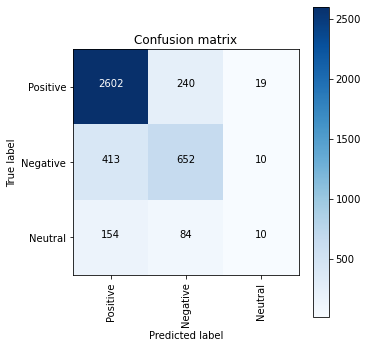

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn import metrics

MNB = MultinomialNB()
MNB.fit(count_train, y_train)
pred = MNB.predict(count_test)
score_MNB = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_MNB)

cm = metrics.confusion_matrix(y_test, pred, labels=['Positive', 'Negative', 'Neutral'])
plot_confusion_matrix(cm, classes=['Positive', 'Negative', 'Neutral'])

###### 2)Random Forest Classifier

accuracy:   0.780
Confusion matrix, without normalization


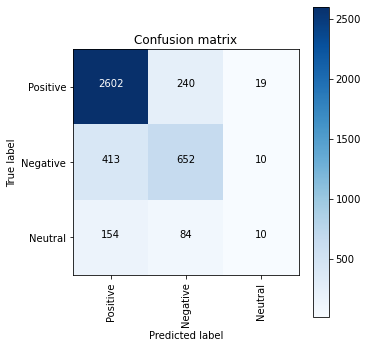

In [71]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(count_train, y_train)
pred = MNB.predict(count_test)
score_RF = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_RF)

cm = metrics.confusion_matrix(y_test, pred, labels=['Positive', 'Negative', 'Neutral'])
plot_confusion_matrix(cm, classes=['Positive', 'Negative', 'Neutral'])

###### 3)PassiveAggressiveClassifier

accuracy:   0.812
Confusion matrix, without normalization


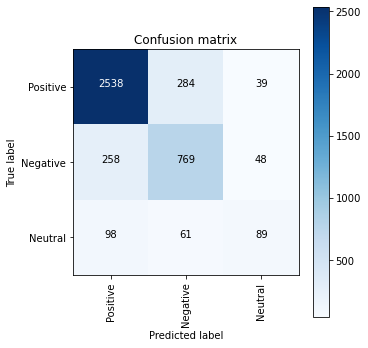

In [72]:
from sklearn.linear_model import PassiveAggressiveClassifier

PAC = PassiveAggressiveClassifier()
PAC.fit(count_train, y_train)
pred = PAC.predict(count_test)
score_PAC = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_PAC)
cm = metrics.confusion_matrix(y_test, pred, labels=['Positive', 'Negative', 'Neutral'])
plot_confusion_matrix(cm, classes=['Positive', 'Negative', 'Neutral'])

###### 4)Logistic Regression

accuracy:   0.840
Confusion matrix, without normalization


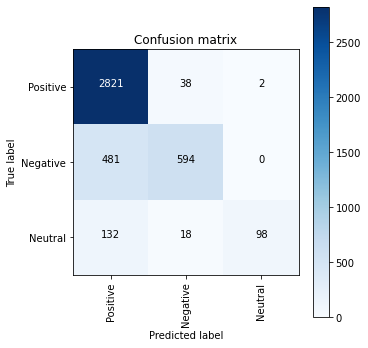

In [73]:
from sklearn import datasets, linear_model
reg = linear_model.LogisticRegression()

LR = RandomForestClassifier()
LR.fit(count_train, y_train)
pred = LR.predict(count_test)
score_LR = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_LR)

cm = metrics.confusion_matrix(y_test, pred, labels=['Positive', 'Negative', 'Neutral'])
plot_confusion_matrix(cm, classes=['Positive', 'Negative', 'Neutral'])

##### 5) K nearest Neighbourhood

accuracy:   0.687
Confusion matrix, without normalization


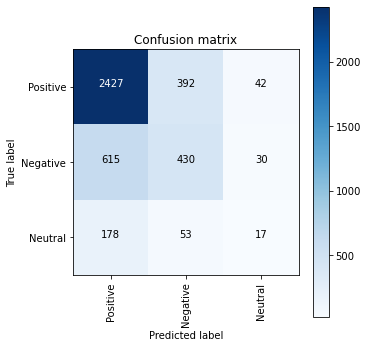

In [74]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)

KNN.fit(count_train, y_train)
pred = KNN.predict(count_test)
score_KNN = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_KNN)

cm = metrics.confusion_matrix(y_test, pred, labels=['Positive', 'Negative', 'Neutral'])
plot_confusion_matrix(cm, classes=['Positive', 'Negative', 'Neutral'])

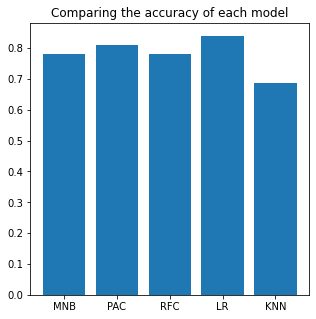

In [75]:
Accuracy = [score_MNB, score_PAC, score_RF, score_LR,score_KNN]
Methods = ['MNB', 'PAC', 'RFC', 'LR','KNN']
Accuracy_pos = np.arange(len(Methods))
plt.figure(figsize=(5,5))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing the accuracy of each model')
plt.show()

###### From the above visualization, we can see that 'LR' model has the high accuracy among all

##### Prediction Sample

In [76]:
text1 = ["I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them"]
test = count_vectorizer.transform(text1)
pred1 = LR.predict(test)[0]
pred1

'Positive'

In [77]:
text2 = ["my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better"]
test = count_vectorizer.transform(text2)
pred2 = LR.predict(test)[0]
pred2

'Negative'

In [78]:
text3 = ["c normal rang lost lbs lab great due weight loss mcg year last c good last time doctor want decreas mcg sever dermatologist last year tri figur hair loss unhealthi hair chang textur never want attribut byetta although hair loss start month began take desper stop hair loss consid stop byetta decid would wors bald gain back pound would realli love know person recent post hair regrowth stop byetta "]
test = count_vectorizer.transform(text3)
pred3 = LR.predict(test)[0]
pred3

'Positive'

###### Model Bulding using Condition

In [123]:
from sklearn.model_selection import train_test_split

fea = df1['review']
tar = df1['condition']

x_train, x_test, y_train, y_test = train_test_split(fea, tar, test_size = 0.3, random_state = 42)

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import itertools

count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(x_train)

count_test = count_vectorizer.transform(x_test)

###### CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach),
while TF-IDF Vectorizer takes into account not only how many times a word appears in a document but also how important 
that word is to the whole corpus

In [118]:
## TFidf Vectorizer (Term Frequency-Inverse Document Frequency) ##
# It is a statistical measure that evaluates how relevant a word is to a document in a collection of documents

## TF (Term Frequency) ##
# How often a term t occurs in a document d.
# TF = (Number of occurences of a word in document) / (Number of words in that document)

## IDF (Inverse Document Frequency) ##
# IDF = log(Number of sentences / Number of sentence containing word)

### TF-IDF Vectorizer

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

### 1) Naive bayes

accuracy:   0.898
Confusion matrix, without normalization


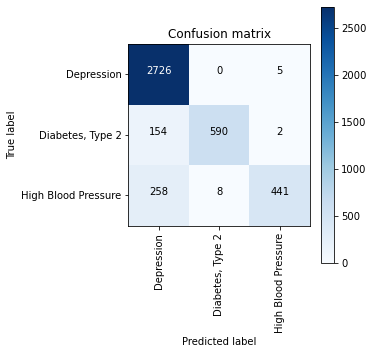

In [120]:
from sklearn.naive_bayes import MultinomialNB

mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train, y_train)
pred = mnb_tf.predict(tfidf_test)
score_mnb = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_mnb)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

### 2) Passive Aggresive Classifier

accuracy:   0.961
Confusion matrix, without normalization


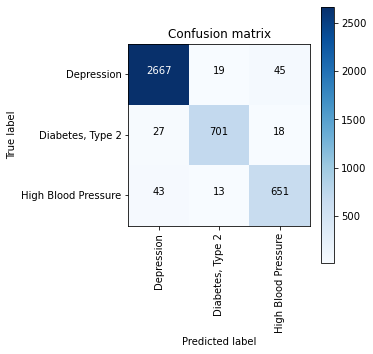

In [121]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac_tf = PassiveAggressiveClassifier()
pac_tf.fit(tfidf_train, y_train)
pred = pac_tf.predict(tfidf_test)
score_pac = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_pac)


cm = metrics.confusion_matrix(y_test, pred, labels=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

### 3) Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

rfc_tf = RandomForestClassifier()
rfc_tf.fit(tfidf_train, y_train)
pred = rfc_tf.predict(tfidf_test)
score_rfc = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_rfc)


accuracy:   0.951


Confusion matrix, without normalization


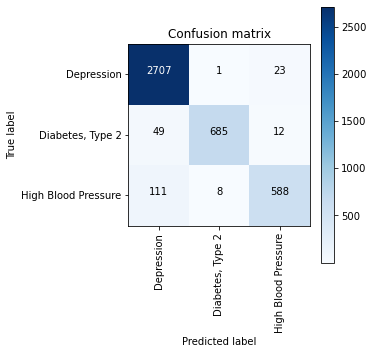

In [86]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

### 4) Logistic Regression

In [87]:
from sklearn import datasets, linear_model
reg = linear_model.LogisticRegression()

lr_tf = RandomForestClassifier()
lr_tf.fit(tfidf_train, y_train)
pred = lr_tf.predict(tfidf_test)
score_lr = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_lr)


accuracy:   0.954


Confusion matrix, without normalization


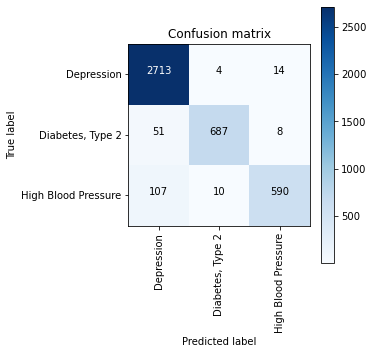

In [88]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

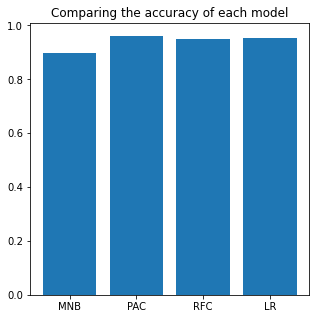

In [89]:
Accuracy = [score_mnb, score_pac, score_rfc, score_lr]
Methods = ['MNB', 'PAC', 'RFC', 'LR']
Accuracy_pos = np.arange(len(Methods))
plt.figure(figsize=(5,5))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing the accuracy of each model')
plt.show()

#### TF-IDF: Bigrams

In [90]:
tfidf_vectorizer_bi = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_bi = tfidf_vectorizer_bi.fit_transform(x_train)
tfidf_test_bi = tfidf_vectorizer_bi.transform(x_test)

### 1) Naive Bais Algorithm

accuracy:   0.765
Confusion matrix, without normalization


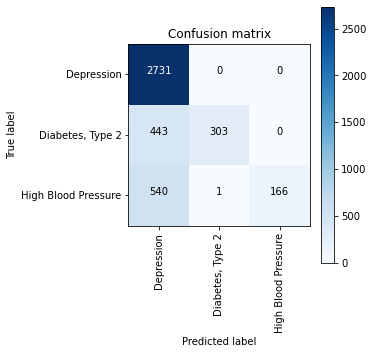

In [91]:
from sklearn.naive_bayes import MultinomialNB

mnb_tf_bi = MultinomialNB()
mnb_tf_bi.fit(tfidf_train_bi, y_train)
pred = mnb_tf_bi.predict(tfidf_test_bi)
score_mnb_bi = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_mnb_bi)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

### 2) Passive Aggressive Classifier

accuracy:   0.965
Confusion matrix, without normalization


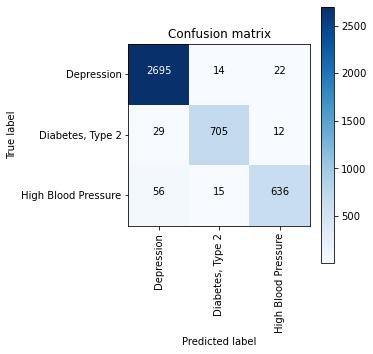

In [92]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac_tf_bi = PassiveAggressiveClassifier()
pac_tf_bi.fit(tfidf_train_bi, y_train)
pred = pac_tf_bi.predict(tfidf_test_bi)
score_pac_bi = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_pac_bi)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

#### 3) Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier

rfc_tf_bi = RandomForestClassifier()
rfc_tf_bi.fit(tfidf_train_bi, y_train)
pred = rfc_tf_bi.predict(tfidf_test_bi)
score_rfc_bi = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_rfc_bi)

accuracy:   0.937


Confusion matrix, without normalization


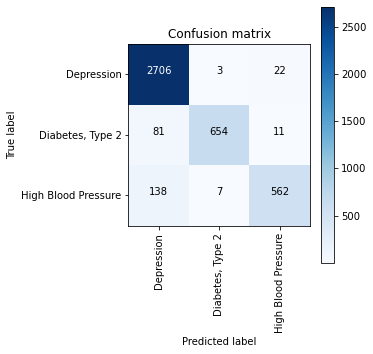

In [94]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

### 4) Logistic Regression

In [95]:
from sklearn import datasets, linear_model
reg = linear_model.LogisticRegression()

lr_tf_bi = RandomForestClassifier()
lr_tf_bi.fit(tfidf_train_bi, y_train)
pred = lr_tf_bi.predict(tfidf_test_bi)
score_lr_bi = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_lr_bi)

accuracy:   0.938


Confusion matrix, without normalization


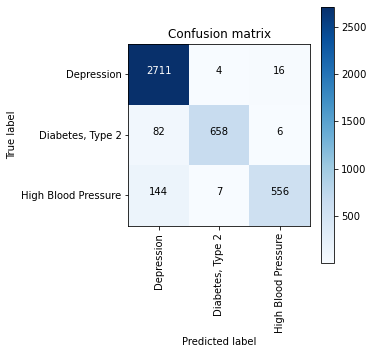

In [96]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

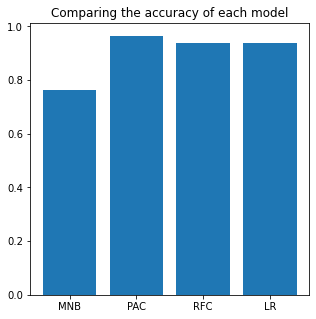

In [97]:
Accuracy = [score_mnb_bi, score_pac_bi, score_rfc_bi, score_lr_bi]
Methods = ['MNB', 'PAC', 'RFC', 'LR']
Accuracy_pos = np.arange(len(Methods))
plt.figure(figsize=(5,5))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing the accuracy of each model')
plt.show()

### TF-IDF: Trigrams

In [98]:
tfidf_vectorizer_tri = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_tri = tfidf_vectorizer_tri.fit_transform(x_train)
tfidf_test_tri = tfidf_vectorizer_tri.transform(x_test)

### 1) Naive Bayes Algorithm

In [99]:
from sklearn.naive_bayes import MultinomialNB

mnb_tf_tri = MultinomialNB()
mnb_tf_tri.fit(tfidf_train_tri, y_train)
pred = mnb_tf_tri.predict(tfidf_test_tri)
score_mnb_tri = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_mnb_tri)

accuracy:   0.746


Confusion matrix, without normalization


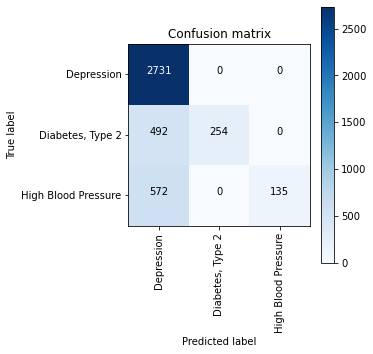

In [100]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

### 2) Passive Agressive Classifier

In [101]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac_tf_tri = PassiveAggressiveClassifier()
pac_tf_tri.fit(tfidf_train_tri, y_train)
pred = pac_tf_tri.predict(tfidf_test_tri)
score_pac_tri = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_pac_tri)

accuracy:   0.965


Confusion matrix, without normalization


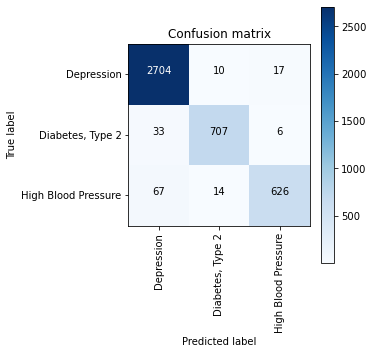

In [102]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

### 3) Random Agressive Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

rfc_tf_tri = RandomForestClassifier()
rfc_tf_tri.fit(tfidf_train_tri, y_train)
pred = rfc_tf_tri.predict(tfidf_test_tri)
score_rfc_tri = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_rfc_tri)

accuracy:   0.933


Confusion matrix, without normalization


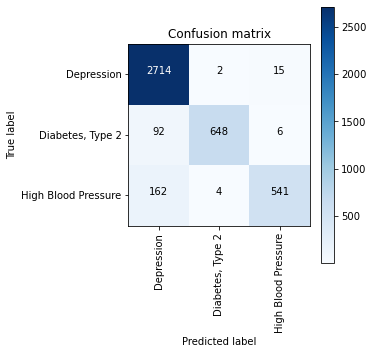

In [104]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

### 4) Logistic Regression

In [105]:
from sklearn import datasets, linear_model
reg = linear_model.LogisticRegression()

lr_tf_tri = RandomForestClassifier()
lr_tf_tri.fit(tfidf_train_tri, y_train)
pred = lr_tf_tri.predict(tfidf_test_tri)
score_lr_tri = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_lr_tri)


accuracy:   0.935


Confusion matrix, without normalization


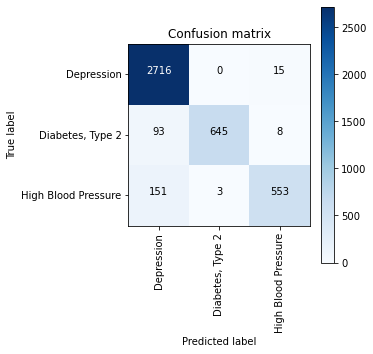

In [106]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

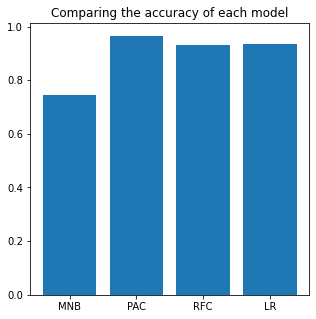

In [107]:
Accuracy = [score_mnb_tri, score_pac_tri, score_rfc_tri, score_lr_tri]
Methods = ['MNB', 'PAC', 'RFC', 'LR']
Accuracy_pos = np.arange(len(Methods))
plt.figure(figsize=(5,5))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing the accuracy of each model')
plt.show()

### ==> From the above visualization, we can see that 'PAC' model has the high accuracy among all

### Model Prediction

### Predictions Samples

In [108]:
text1 = ["I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them"]
test = tfidf_vectorizer.transform(text1)
pred1 = pac_tf.predict(test)[0]
pred1

'Depression'

In [109]:
text2 = ["my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better"]
test = tfidf_vectorizer.transform(text2)
pred2 = pac_tf.predict(test)[0]
pred2

'Diabetes, Type 2'

In [110]:
text3 = ["c normal rang lost lbs lab great due weight loss mcg year last c good last time doctor want decreas mcg sever dermatologist last year tri figur hair loss unhealthi hair chang textur never want attribut byetta although hair loss start month began take desper stop hair loss consid stop byetta decid would wors bald gain back pound would realli love know person recent post hair regrowth stop byetta "]
test = tfidf_vectorizer.transform(text3)
pred3 = pac_tf.predict(test)[0]
pred3

'Diabetes, Type 2'

In [128]:
import joblib
joblib.dump(tfidf_vectorizer,'tfidf_vectorizer.pkl')
joblib.dump(pac_tf,'pac_tf.pkl')

['pac_tf.pkl']

In [129]:
vectorizer= joblib.load('tfidf_vectorizer.pkl')
model=joblib.load('pac_tf.pkl')


test = model.predict(vectorizer.transform(["I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them"]))
test[0] 

'Depression'